#### Import required libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

#### Load train and test dataset

In [5]:
train_data=pd.read_csv('Dataset/train.csv')
test_data=pd.read_csv('Dataset/test.csv')

#### Print first 5 rows of train data

In [6]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


#### Check shape of train and test data

In [10]:
train_data.shape

(614, 13)

In [11]:
test_data.shape

(367, 12)

#### Print dtypes and name of columns

In [12]:
train_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

#### Check if train and test data has any missing or null values

In [13]:
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
test_data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

#### Gender is a categorical column, lets see its value counts before handling missing values

In [15]:
train_data['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

#### As male category is more frequent , we will impute missing values with 'Male' i.e. mode of Gender.

In [17]:
train_data['Gender']=train_data['Gender'].fillna(train_data['Gender'].mode()[0])
test_data['Gender']=test_data['Gender'].fillna(train_data['Gender'].mode()[0])

#### Married is also a categorical column , lets see its value counts 

In [19]:
train_data['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

#### As Yes category is more frequent , we will impute missing values with 'Yes' i.e. mode of Married.

In [21]:
train_data['Married']=train_data['Married'].fillna(train_data['Married'].mode()[0])
test_data['Married']=test_data['Married'].fillna(train_data['Married'].mode()[0])

#### Let's see value counts for Dependents

In [23]:
train_data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

#### As '0' category is more frequent , we will impute missing values with '0' i.e. mode of Dependents.

In [25]:
train_data['Dependents']=train_data['Dependents'].fillna(train_data['Dependents'].mode()[0])
test_data['Dependents']=test_data['Dependents'].fillna(train_data['Dependents'].mode()[0])

#### Let's see value counts for Self_Employed

In [26]:
train_data['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

#### As No category is more frequent , we will impute missing values with 'NO' i.e. mode of Self_Employed.

In [28]:
train_data['Self_Employed']=train_data['Self_Employed'].fillna(train_data['Self_Employed'].mode()[0])
test_data['Self_Employed']=test_data['Self_Employed'].fillna(train_data['Self_Employed'].mode()[0])

#### LoanAmount is a numerical column, let's see its distribution  before imputing missing values

/usr/local/lib64/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib64/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 72., 310., 143.,  33.,  15.,   6.,   5.,   3.,   3.,   2.]),
 array([  9. ,  78.1, 147.2, 216.3, 285.4, 354.5, 423.6, 492.7, 561.8,
        630.9, 700. ]),
 <a list of 10 Patch objects>)

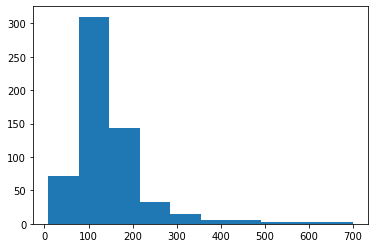

In [29]:
plt.hist(train_data['LoanAmount'])

#### As you can see , LoanAmount has skewed distribution we will impute missing values with median.

In [30]:
train_data['LoanAmount']=train_data['LoanAmount'].fillna(train_data['LoanAmount'].median())
test_data['LoanAmount']=test_data['LoanAmount'].fillna(train_data['LoanAmount'].median())